# L1. Quantum Computing Basics

Meijian Li [meijian.li@usc.es] Feb, 2025


In [1]:
!pip install qiskit==1.3
!pip install qiskit-aer
!pip install qiskit_algorithms
!pip install matplotlib
!pip install pylatexenc
!pip install numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=95094aa929a257bf03ba83ce43ae99917bccdc8eadc6bbb6213d273fccf8ef9a
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703ad

In [3]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Pauli, SparsePauliOp, Statevector
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_circuit_layout
from math import pi

from qiskit.primitives import StatevectorSampler, StatevectorEstimator

from IPython.display import display, Latex
import matplotlib.pyplot as plt

from qiskit.circuit.library import QFT

## 0. Hello World in Qiskit
The code in the followin cell contains a simple example to construct and draw a quantum circuit with Qiskit.

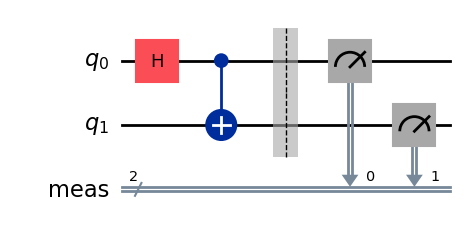

In [4]:
# Create a new circuit with two qubits
qc0 = QuantumCircuit(2)

# Add a Hadamard gate to qubit 0
qc0.h(0)

# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc0.cx(0, 1)

# map qubits to classical bits
qc0.measure_all()

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc0.draw("mpl")

## 1. Quantum Circuit
Quantum circuits are models for quantum computation in which a computation is a sequence of quantum gates.
Quantum gates often represent rotations on the Bloch sphere. Let's start with quantum gates.


### 1.1 Quantum state

#### 1.1.1 Single-qubit state
A single qubit state can be represented by a column vector in 2 dimension:

$\lvert\psi\rangle = \begin{pmatrix}
\alpha \\
\beta \\
\end{pmatrix}$

It is parametrized by two complex numbers $\alpha$ and $\beta$ satisfying $|\alpha|^2 + |\beta|^2=1$.

There are infinite many ways to define the basis states, and one natural option is:

$\lvert0\rangle = \begin{pmatrix}
1 \\
0 \\
\end{pmatrix}\;,
\quad
\lvert1\rangle = \begin{pmatrix}
0 \\
1 \\
\end{pmatrix}\;.
$

<div class="alert alert-block alert-success">

**Q1.1.1 Write  $\lvert\psi\rangle$ in terms of the basis states**  

</div>

==================================

Replace the question marks by your answer:

$\lvert\psi\rangle = ?\lvert0\rangle + ?\lvert1\rangle\;.$

==================================

In principle, one cannot extract the quantum state itself from a real quantum circuit, only its information by measurement. Yet, with a quantum simulator, we can use Statevector to get the state itself, which is sometimes helpful for our understanding.


In [5]:
# Create a new circuit with 1 qubits
qc1 = QuantumCircuit(1)

qc1_state = Statevector(qc1)

# Note: Qiskit numbers the bits in a string from right to left.
qc1_state.draw('latex', max_size=16)

<IPython.core.display.Latex object>

You have seen that the initial state on a qubit is $|0\rangle$ by default.

#### The Bloch sphere
A single qubit in the state $\lvert\psi\rangle = \alpha\lvert0\rangle + \beta\lvert1\rangle$  can be visualized as a point $(\theta, \phi)$ on the unit sphere, where $\alpha=\cos(\theta/2)$, $\beta=e^{i\phi}\sin(\theta/2)$, and $\alpha$ can be taken to be real
because the overall phase of the state is unobservable. This is called the Bloch sphere
representation, and the vector $(\cos \phi \sin \theta, \sin \phi \sin \theta, \cos \theta)$ is called the Bloch vector.

With qiskit, we can plot the Bloch sphere representation of a state by:

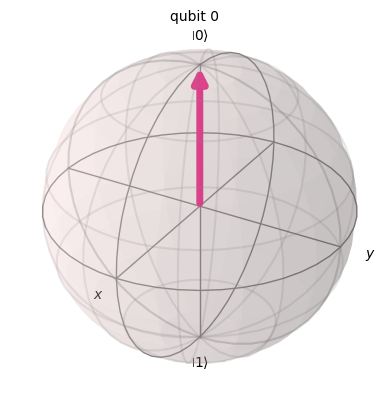

In [6]:
plot_bloch_multivector(qc1_state)

Let's see another example:

In [7]:
# Create a new circuit with 1 qubits
qc2 = QuantumCircuit(1)

# Add a Hadamard gate to qubit 0
qc2.h(0)

qc2_state = Statevector(qc2)

# Note: Qiskit numbers the bits in a string from right to left.
qc2_state.draw('latex', max_size=16)

<IPython.core.display.Latex object>

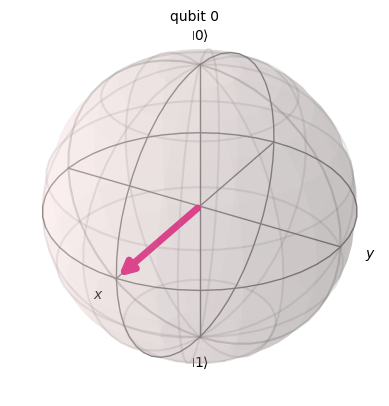

In [8]:
plot_bloch_multivector(qc2_state)

#### 1.1.2 Multi-qubit state
In quantum mechanics, the state space of a composite physical system is the tensor product of the state spaces of the component physical systems.

You have seen the basis states for the single qubit state,
$$\lvert0\rangle = \begin{pmatrix}
1 \\
0 \\
\end{pmatrix}\;,
\quad
\lvert1\rangle = \begin{pmatrix}
0 \\
1 \\
\end{pmatrix}\;.
$$

<div class="alert alert-block alert-success">
    
**Q1.1.2 Basis states of the 2-qubit system**  
Can you write out the basis states for a two-qubit state? What is the dimension? You can write it on a paper.
</div>

====================================================================

Write your answer here or on a paper

$$
\lvert00\rangle = \lvert0\rangle\otimes \lvert0\rangle= \begin{pmatrix}
1 \\
0 \\
0 \\
0 \\
\end{pmatrix}\;,
\quad
\lvert01\rangle = \begin{pmatrix}
0 \\
1 \\
0 \\
0 \\
\end{pmatrix}\;,
\quad
\lvert10\rangle = \lvert0\rangle\otimes \lvert0\rangle= \begin{pmatrix}
0 \\
0 \\
1 \\
0 \\
\end{pmatrix}\;,
\quad
\lvert11\rangle = \begin{pmatrix}
0 \\
0 \\
0 \\
1 \\
\end{pmatrix}\;.
$$

====================================================================


<div class="alert alert-block alert-success">

**Q1.1.3 Create a circuit with 5 qubits, and access the state vector**  
Clue: check what did in Sec 1.1.1 for the single-qubit circuit.
</div>

In [9]:
##### ==================================
# Write your solution in here.
qc5 = QuantumCircuit(5)
qc5_state = Statevector(qc5)
qc5_state.draw('latex', max_size=16)
##### ==================================

<IPython.core.display.Latex object>

### 1.2 Single qubit gates
Now, let us look at the operations on the simplest quantum system of all – a single qubit, single qubit gates.

Operations on a qubit must preserve its norm, and are thus described by $2\times 2$ unitary matrices. In the following, we will get familiar with some of the most important ones.

#### X gate
The X-gate is represented by the Pauli-X matrix:

$X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}$

An X gate equates to a rotation around the X-axis of the Bloch sphere by $\pi$ radians. It maps $|0\rangle$ to $|1\rangle$ and $|1\rangle$ to $|0\rangle$. It is the quantum equivalent of the NOT gate for classical computers and is sometimes called a bit-flip.

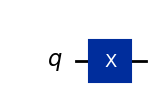

In [10]:
# Let's apply an X-gate on a |0> qubit
qcx = QuantumCircuit(1) # Create a quantum circuit with 1 qubit
qcx.x(0) # Apply an X gate to the 0-th qubit
qcx.draw(output='mpl') # draw the circuit

<div class="alert alert-block alert-success">

**Q1.2.1 Use Statevector to check the final state of the above circuit**  
Clue: Check Sec. 1.1

</div>

In [11]:
##### ==================================
# Write your solution in here.
qcx_state = Statevector(qcx)

##### ==================================
# Note: Qiskit numbers the bits in a string from right to left.
qcx_state.draw('latex', max_size=16)

<IPython.core.display.Latex object>

<div class="alert alert-block alert-success">

**Q1.2.2 Show the Bloch sphere representation of the obtained state**  
Clue: Check Sec. 1.1
</div>

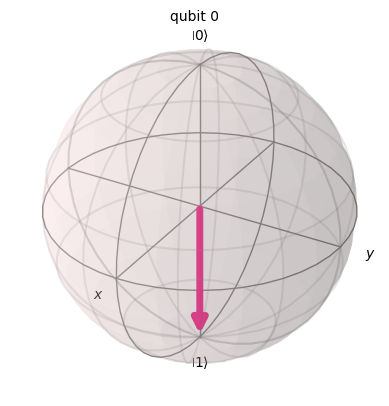

In [12]:
##### ==================================
# Write your solution in here.
plot_bloch_multivector(qcx_state)
##### ==================================

We can also make a measurement on the circuit.

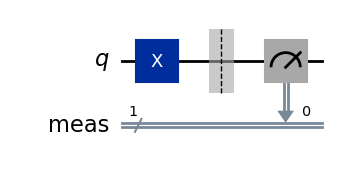

In [13]:
# map qubits to classical bits
qcx.measure_all()
qcx.draw(output='mpl') # draw the circuit

#### Y gate
The Y-gate is represented by the Pauli-Y matrix:

$Y = \begin{pmatrix}
0 & -i \\
i & 0 \\
\end{pmatrix}$

It maps $|0\rangle$ to $i|1\rangle$ and $|1\rangle$ to $-i|0\rangle$.

<div class="alert alert-block alert-success">

**Q1.2.3 Construct a single-qubit circuit and apply an Y gate on it**  
You have just seen above how an X gate operates on a qubit. Based on that, can you guess what it is like for the Y gate?

</div>

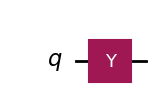

In [14]:
# Let's apply an Y-gate on a |0> qubit
##### ==================================
# Write your solution in here.
qcy = QuantumCircuit(1) # Create a quantum circuit with 1 qubit
qcy.y(0) # Apply a Y gate to the 0-th qubit
##### ==================================
qcy.draw(output='mpl') # draw the circuit

That's right, the operator of the Y gate is simply "y", as "x" for the X gate, quite intuitive, right? This is similar for Z and H gates that we will see soon.

For now, let us complete the exercise for Y gate by checking the final state.

In [15]:
# Use Statevector to check the final state
##### ==================================
# Write your solution in here.
qcy_state = Statevector(qcy)

##### ==================================
# Note: Qiskit numbers the bits in a string from right to left.
qcy_state.draw('latex', max_size=16)

<IPython.core.display.Latex object>

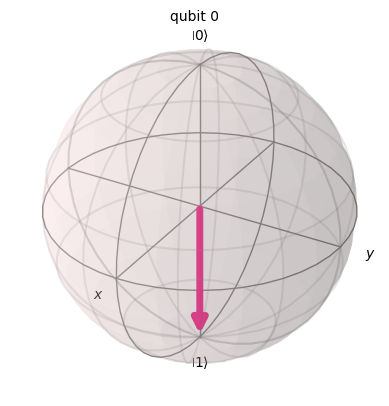

In [16]:
# Show its Bloch sphere representation
##### ==================================
# Write your solution in here.
plot_bloch_multivector(qcy_state)
##### ==================================

#### Z gate
The Z-gate is represented by the Pauli-Z matrix:

$Z = \begin{pmatrix}
1 & 0 \\
0 & -1 \\
\end{pmatrix}$

The Z gate leaves $|0\rangle$ unchanged, and flips the sign of $|1\rangle$ to give $-|1\rangle$.

<div class="alert alert-block alert-success">

**Q1.2.4 Construct a single-qubit circuit and apply a Z gate on it**  

</div>

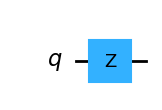

In [17]:
# Let's apply an Z-gate on a |0> qubit
##### ==================================
# Write your solution in here.
qcz = QuantumCircuit(1) # Create a quantum circuit with 1 qubit
qcz.z(0) # Apply an Z gate to the 0-th qubit
##### ==================================
qcz.draw(output='mpl') # draw the circuit

In [18]:
# Use Statevector to check the final state
##### ==================================
# Write your solution in here.
qcz_state = Statevector(qcz)
##### ==================================
# Note: Qiskit numbers the bits in a string from right to left.
qcz_state.draw('latex', max_size=16)

<IPython.core.display.Latex object>

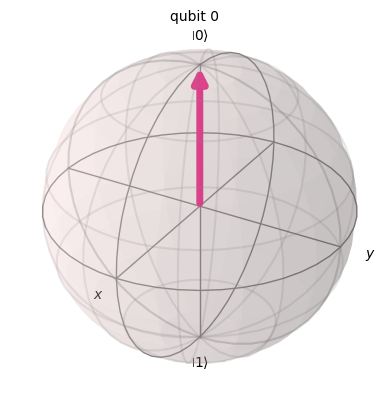

In [19]:
# Show its Bloch sphere representation
##### ==================================
# Write your solution in here.
plot_bloch_multivector(qcz_state)
##### ==================================

<div class="alert alert-block alert-success">

**Q1.2.5 Construct a single-qubit circuit and apply a Z gate on a $|1\rangle$ state**  
Clue: recall how we created a $|1\rangle$ state in the previous exercises.
</div>

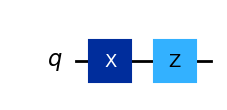

In [20]:
# Let's apply an Z-gate on a |1> qubit
##### ==================================
# Write your solution in here.
qcz1 = QuantumCircuit(1) # Create a quantum circuit with 1 qubit
qcz1.x(0) # Apply an Z gate to the 0-th qubit
qcz1.z(0) # Apply an Z gate to the 0-th qubit
##### ==================================
qcz1.draw(output='mpl') # draw the circuit

In [21]:
# Use Statevector to check the final state
##### ==================================
# Write your solution in here.
qcz1_state = Statevector(qcz1)
##### ==================================
# Note: Qiskit numbers the bits in a string from right to left.
qcz1_state.draw('latex', max_size=16)

<IPython.core.display.Latex object>

#### Hadamard gate (H gate)
A Hadamard gate represents a rotation of $\pi$ about the axis that is in the middle of the X-axis and Z-axis.
It maps the basis state $|0\rangle$ to $|+\rangle\equiv\frac{|0\rangle + |1\rangle}{\sqrt{2}}$, which means that a measurement will have equal probabilities of being `1` or `0`, creating a 'superposition' of states. What the Hadamard does is to transform between the $\{|0\rangle, |1\rangle\}$ and the $\{|+\rangle, |-\rangle\}$ base. It matrix representation is

$H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}$

<div class="alert alert-block alert-success">

**Q1.2.6 Construct a single-qubit circuit and apply an H gate on it**  

</div>

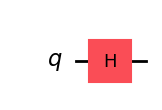

In [22]:
# Let's apply an H-gate on a |0> state, and draw the circuit
##### ==================================
# Write your solution in here.
qch = QuantumCircuit(1) # Create a quantum circuit with 1 qubit
qch.h(0) # Apply an H gate to the 0-th qubit
qch.draw(output='mpl') # draw the circuit
##### ==================================

In [23]:
# Use Statevector to check the final state
##### ==================================
# Write your solution in here.
qch_state = Statevector(qch)

##### ==================================

# Note: Qiskit numbers the bits in a string from right to left.
qch_state.draw('latex', max_size=16)

<IPython.core.display.Latex object>

Great! You have made a $|+\rangle$ state on the circuit.

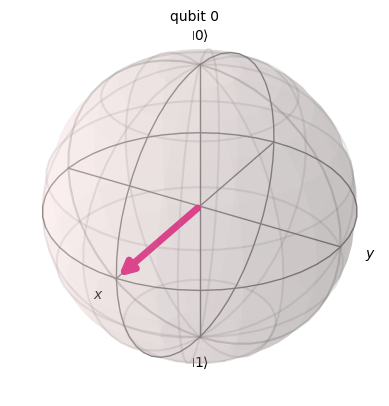

In [24]:
# Show the Bloch sphere representation
##### ==================================
# Write your solution in here.
plot_bloch_multivector(qch_state)
##### ==================================

<div class="alert alert-block alert-success">

**Q1.2.7 Find out the $|-\rangle$ state**  
    
Clue: Build a quantum circuit that applies H gate on $|1\rangle$.   
</div>

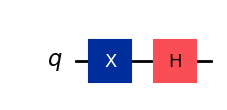

In [25]:
qc_Q1p1 = QuantumCircuit(1)
##### ==================================
# Write your solution in here.
qc_Q1p1.x(0) # Apply an X gate to the 0-th qubit
qc_Q1p1.h(0) # Apply an H gate to the 0-th qubit
##### ==================================
qc_Q1p1.draw(output='mpl') # draw the circuit

Like before, check your solution with Statevector and Bloch sphere representation.

In [26]:
# Statevector representation
##### ==================================
# Write your solution in here.
qc_Q1p1_state = Statevector(qc_Q1p1)

##### ==================================

# Note: Qiskit numbers the bits in a string from right to left.
qc_Q1p1_state.draw('latex', max_size=16)

<IPython.core.display.Latex object>

Verify the result you got by comparing it to that obtained through matrix multiplication $|-\rangle=H|1\rangle$.

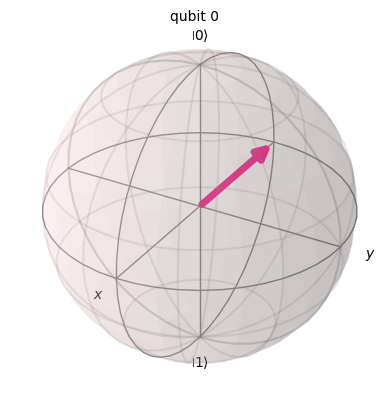

In [27]:
# Bloch sphere representation
##### ==================================
# Write your solution in here.
plot_bloch_multivector(qc_Q1p1_state)
##### ==================================

#### Phase gate (P gate)

The phase gate is a single-qubit rotation gate about the Z axis. It is a crucial quantum gate generating the relative phase between $|0\rangle$ and $|1\rangle$. It can be implemented virtually in hardware via framechanges (i.e. at zero error and duration). Unlike the Hadamard and X gate, the phase gate also takes in a rotation angle $\lambda$ (in radians).

$P(\lambda) = \begin{pmatrix}
1 & 0 \\
0 & e^{i\lambda} \\
\end{pmatrix}$

Note, the phase gate is a generalized gate for several commonly used quantum gates:

$P(\lambda =\pi) = Z,\qquad
P(\lambda =\pi/2)= S,\qquad
P(\lambda =\pi/4)= T$

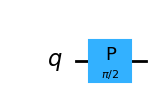

In [ ]:
# Apply a P-gate with pi rotation phase on a |0> state
qcp = QuantumCircuit(1)
qcp.p(pi/2, 0)
qcp.draw(output='mpl')

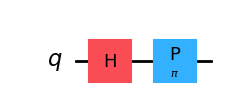

In [ ]:

# Apply a T-gate on a |+> state
qct = QuantumCircuit(1)
qct.h(0)
qct.p(pi, 0)
qct.draw(output='mpl')

<div class="alert alert-block alert-success">
    
**Q1.2.6 Circuit identities (Optional)**  
    
Prove the identity:  HXH=Z;

Complete the following: HYH = ?; HZH = ?

If you are very familiar with matrix multiplication, you can also do this exercise on a paper.

You can skip this exercise and come back to it after going through this notebook.
    
</div>

In [ ]:
## Check by matrix multiplication
## you can also do this by hand

import sympy as sp
import cmath

# Define symbolic Hadamard and X gates
sqrt2 = sp.sqrt(2)
H_matrix = sp.Matrix([[1/sqrt2, 1/sqrt2], [1/sqrt2, -1/sqrt2]])
X_matrix = sp.Matrix([[0, 1], [1, 0]])
Y_matrix = sp.Matrix([[0, -sp.I], [sp.I, 0]])
Z_matrix = sp.Matrix([[1, 0], [0, -1]])

# Perform symbolic matrix multiplication
LHS = H_matrix @ X_matrix @ H_matrix

print("Matrix HXH (exact):")
sp.pprint(LHS)

print("\nMatrix Z:")
sp.pprint(Z_matrix)

# Check for symbolic equality
print("\nIs HXH equal to Z?")
print(LHS == Z_matrix)


Matrix HXH (exact):
⎡1  0 ⎤
⎢     ⎥
⎣0  -1⎦

Matrix Z:
⎡1  0 ⎤
⎢     ⎥
⎣0  -1⎦

Is HXH equal to Z?
True


In [ ]:
## Check HYH and HZH by matrix multiplication

##### ==================================
# Write your solution in here.


# Perform symbolic matrix multiplication
HYH = H_matrix @ Y_matrix @ H_matrix


# Perform symbolic matrix multiplication
HZH = H_matrix @ Z_matrix @ H_matrix
##### ==================================


print("Matrix HYH (exact):")
sp.pprint(HYH)

print("Matrix HZH (exact):")
sp.pprint(HZH)


Matrix HYH (exact):
⎡0   ⅈ⎤
⎢     ⎥
⎣-ⅈ  0⎦
Matrix HZH (exact):
⎡0  1⎤
⎢    ⎥
⎣1  0⎦


The identies we have proved are:  HXH=Z; HYH = -Y; HZH = X.
They are sometimes useful to simplify circuits.

### 1.3 Controlled operations
‘If A is true, then do B’.

<img style="float: middle" src="images/CU_gate.png" width="200">

Suppose U is an arbitrary single qubit unitary operation. A controlled-
U operation is a two qubit operation, with a c(control) and a t(target) qubit. If the c
qubit is set then U is applied to the target qubit, otherwise the t qubit is left alone;
that is, $|c\rangle|t\rangle \rightarrow |c\rangle U^c|t\rangle$ .

#### Controlled-NOT gate (CX, CNOT gate)

The controlled NOT (or CNOT or CX) gate acts on two qubits. It performs the NOT operation (equivalent to applying an X gate) on the second qubit only when the first qubit is $|1\rangle$ and otherwise leaves it unchanged.

$CX = \begin{pmatrix}
1 & 0 & 0 & 0  \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end{pmatrix}$

The outcome of the states is summarized as the following:
$$
\begin{array}{c}
\large |c\rangle|t\rangle \rightarrow |c'\rangle |t'\rangle\\
\large |0\rangle|0\rangle \rightarrow |0\rangle|0\rangle\\
\large |0\rangle|1\rangle \rightarrow |0\rangle|1\rangle\\
\large|1\rangle|0\rangle \rightarrow |1\rangle|1\rangle\\
\large |1\rangle|1\rangle \rightarrow |1\rangle|0\rangle\\
\end{array}
$$

Let's build a circuit with a CX gate.

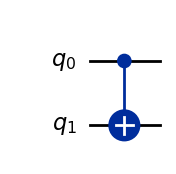

In [28]:
qc_cx = QuantumCircuit(2)
qc_cx.cx(0,1) # here, the c qubit is the 0th qubit, and the t qubit is the 1st qubit
qc_cx.draw(output='mpl')

In [29]:
# Statevector representation
qc_cx_state = Statevector(qc_cx)

# Note: Qiskit numbers the bits in a string from right to left.
qc_cx_state.draw('latex', max_size=16)

<IPython.core.display.Latex object>

<div class="alert alert-block alert-success">
    
**Q1.3.1 Apply a CX gate to $|t=0\rangle|c=1\rangle$ state**  

Note that Qiskit numbers the bits in a string from right to left, e.g., in  $|01\rangle$, the 0-th qubit is $1$ and the 1-st qubit is $0$.
</div>

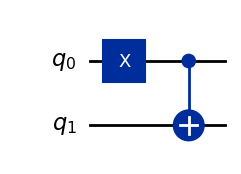

In [30]:
qc_cx10 = QuantumCircuit(2)
##### ==================================
# Write your solution in here.
qc_cx10.x(0)
qc_cx10.cx(0,1)
##### ==================================
qc_cx10.draw(output='mpl')

Check the result:

In [31]:
# Statevector representation
qc_cx10_state = Statevector(qc_cx10)
# Note: Qiskit numbers the bits in a string from right to left.
qc_cx10_state.draw('latex', max_size=16)

<IPython.core.display.Latex object>

#### Controlled-Z gate

The controlled-Z (or CZ) gate acts on two qubits. It performs the Z gate operation on the t(target) qubit only when the c(control) qubit is $|1\rangle$ and otherwise leaves it unchanged.

$CZ = \begin{pmatrix}
1 & 0 & 0 & 0  \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1 \\
\end{pmatrix}$


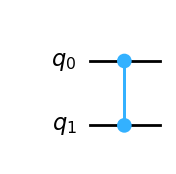

In [32]:
qc_cz = QuantumCircuit(2)
qc_cz.cz(0,1)
qc_cz.draw(output='mpl')

<div class="alert alert-block alert-success">

**Q1.3.2 Construct a CNOT gate from one CZ and two Hadamard gates (optional)**  
Clue: Use the identities in Q1.2.6.
</div>

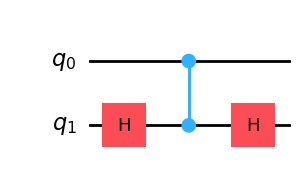

In [33]:
qc_Q1 = QuantumCircuit(2)
##### ==================================
# Write your solution in here.
qc_Q1.h(1)
qc_Q1.cz(0,1)
qc_Q1.h(1)
##### ==================================
qc_Q1.draw(output='mpl')

<div class="alert alert-block alert-success">

**Q1.3.3 CNOT in the $|\pm\rangle$ basis**  
What happens when the CNOT gate applies to $|+\rangle|+\rangle$, $|+\rangle|-\rangle$, $|-\rangle|+\rangle$, and $|-\rangle|-\rangle$? Check the control and target bits.
</div>

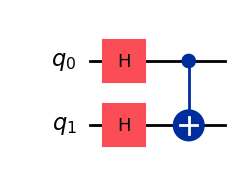

In [34]:
## c=|+>, t=|+>
qc_pp = QuantumCircuit(2)
##### ==================================
# Write your solution in here.
qc_pp.h(0)
qc_pp.h(1)
qc_pp.cx(0,1)
##### ==================================
qc_pp.draw(output='mpl')

In [35]:
# Statevector representation
qc_pp_state = Statevector(qc_pp)
qc_pp_state.draw('latex', max_size=16)

<IPython.core.display.Latex object>

What do you get? Can you write it in the $\{|+\rangle,|-\rangle\}$ basis?

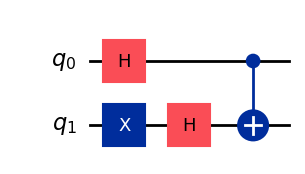

In [36]:
## c=|+>, t=|->
qc_pm = QuantumCircuit(2)
##### ==================================
# Write your solution in here.
qc_pm.h(0)
qc_pm.x(1)
qc_pm.h(1)
qc_pm.cx(0,1)
##### ==================================
qc_pm.draw(output='mpl')


In [37]:
# Statevector representation
qc_pm_state = Statevector(qc_pm)
qc_pm_state.draw('latex', max_size=16)

<IPython.core.display.Latex object>

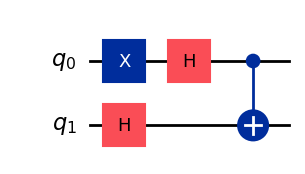

In [ ]:
## c=|->, t=|+>
qc_mp = QuantumCircuit(2)
##### ==================================
# Write your solution in here.
qc_mp.x(0)
qc_mp.h(0)
qc_mp.h(1)
qc_mp.cx(0,1)
##### ==================================
qc_mp.draw(output='mpl')


In [ ]:
# Statevector representation
qc_mp_state = Statevector(qc_mp)
qc_mp_state.draw('latex', max_size=16)

<IPython.core.display.Latex object>

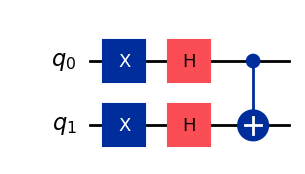

In [ ]:
## c=|->, t=|->
qc_mm = QuantumCircuit(2)
##### ==================================
# Write your solution in here.
qc_mm.x(0)
qc_mm.h(0)
qc_mm.x(1)
qc_mm.h(1)
qc_mm.cx(0,1)
##### ==================================
qc_mm.draw(output='mpl')


In [ ]:
# Statevector representation
qc_mm_state = Statevector(qc_mm)
qc_mm_state.draw('latex', max_size=16)

<IPython.core.display.Latex object>

Summarize the results you got to complete the following table
$$
\begin{array}{c}
\large |c\rangle|t\rangle \rightarrow |c'\rangle |t'\rangle\\
\large |+\rangle|+\rangle \rightarrow |?\rangle |?\rangle\\
\large |+\rangle|-\rangle \rightarrow |?\rangle |?\rangle\\
\large |-\rangle|+\rangle \rightarrow |?\rangle |?\rangle\\
\large |-\rangle|-\rangle \rightarrow |?\rangle |?\rangle\\
\end{array}
$$

In this basis, the target and control have essentially interchanged their roles!

#### CCX gate (Toffoli gate)

The CCX gate (controlled controlled X Gate) is also known as the Toffoli gate. The CCX gate is a three-bit gate, with two controls and one target as their input and output. If the first two bits are in the state $|1\rangle$, it applies a Pauli-X (or NOT) on the third bit. Otherwise, it does nothing. What is the matrix representation of the CCX gate?

$CCX = \begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
\end{pmatrix}$

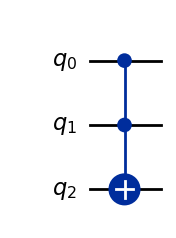

In [ ]:
qc_ccx = QuantumCircuit(3)
qc_ccx.ccx(0,1,2)
qc_ccx.draw(output='mpl')

## 2. Measurement & Qiskit primitives

The primitives are computational building blocks to be used in larger applications whose input units, called primitive unified blocs (PUBs), require quantum resources to efficiently produce outputs for.

### 2.0 Measurement
On a quantum circuit, a measurement is represented by a measurement meter. Upon measurement, the quantum state collapse to a classical state.


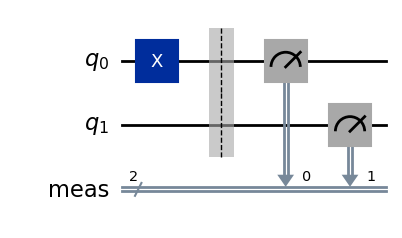

In [38]:
# use measure_all() to measure all qubits
qcm1 = QuantumCircuit(2)
qcm1.x(0)
# map qubits to classical bits
qcm1.measure_all()
qcm1.draw(output='mpl') # draw the circuit

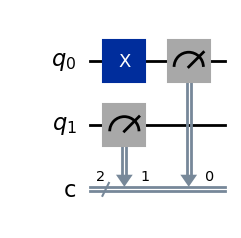

In [39]:
# use measure() to measure specific qubits
qcm2 = QuantumCircuit(2,2) # Create a quantum circuit with 2 qubits and 2 classical bits
qcm2.x(0) # Apply an X gate to the 0-th qubit
# map qubits to classical bits
qcm2.measure([0,1],[0,1])
# qcm2.measure([0],[0])
qcm2.draw(output='mpl') # draw the circuit

### 2.1 Sampler
Sampler runs quantum circuits and returns probability distributions.

class qiskit.primitives.StatevectorSampler(*, default_shots=1024, seed=None)

Parameters:

- pubs (Iterable) – An iterable of pub-like objects. For example, a list of circuits or tuples (circuit, parameter_values).
- shots (int | None) – The total number of shots to sample for each sampler pub that does not specify its own shots. If None, the primitive’s default shots value will be used, which can vary by implementation.


In [40]:
# Let's get the result by running the circuits we build in Sec. 2.0
# qcm1
# from qiskit.primitives import StatevectorSampler

shots = 8092
sampler = StatevectorSampler()
job = sampler.run([qcm1], shots=shots)

# meas
counts = job.result()[0].data.meas.get_counts()

print(f"Measurement result of qcm1: {counts}")

Measurement result of qcm1: {'01': 8092}


In [ ]:
# Let's get the result by running the circuits we build in Sec. 2.0
# qcm2
# from qiskit.primitives import StatevectorSampler

shots = 8092
sampler = StatevectorSampler()
job = sampler.run([qcm2], shots=shots)

# c
counts = job.result()[0].data.c.get_counts()

print(f"Measurement result of qcm2: {counts}")

Measurement result of qcm2: {'01': 8092}


Plot a histogram of the counts:

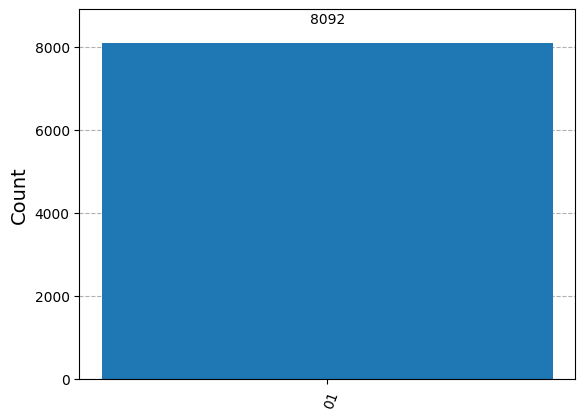

In [41]:
plot_histogram(counts)

<div class="alert alert-block alert-success">

**Q2.1.1 Measure a two-qubit state**  
Apply measurement to the circuit qc_pp that we have constructed in Q1.3.3, i.e., CNOT operating on  $|+\rangle|+\rangle$. Then use sampler to get the state distribution, and plot the counts.
</div>

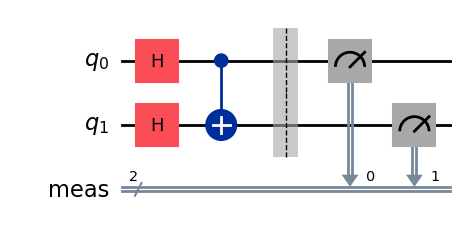

In [42]:
qc_pp = QuantumCircuit(2)
qc_pp.h(0)
qc_pp.h(1)
qc_pp.cx(0,1)
##### ==================================
# Write your solution in here.
qc_pp.measure_all()
##### ==================================
qc_pp.draw(output='mpl')

In [46]:
# use sampler to sample the state distribution

sampler = StatevectorSampler()
shots = 1024000
##### ==================================
# Write your solution in here.
job = sampler.run([qc_pp], shots=shots)
counts = job.result()[0].data.meas.get_counts()
##### ==================================

print(f"Measurement result of qc_pp: {counts}")

Measurement result of qc_pp: {'00': 256037, '10': 255585, '01': 256061, '11': 256317}


Plot the results into a histogram:

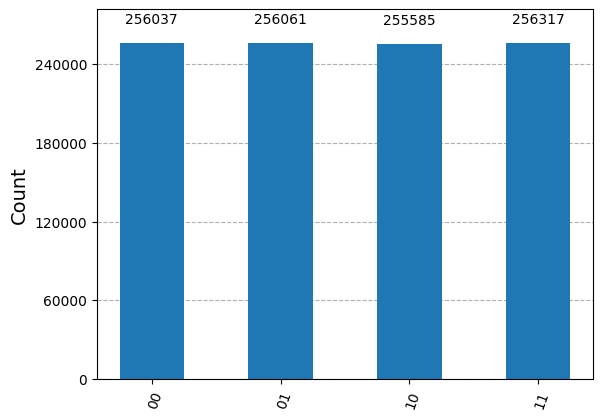

In [47]:
plot_histogram(counts)

Observe what happens to the result when you:

(1) rerun the same code with the sampler;

(2) increase the number of shots.

### 2.2 Estimator
Estimator computes expectation values of observables.

class qiskit.primitives.StatevectorEstimator(*, default_precision=0.0, seed=None)

Parameters:

- default_precision (float) – The default precision for the estimator if not specified during run.
- seed (np.random.Generator | int | None) – The seed or Generator object for random number generation. If None, a random seeded default RNG will be used.

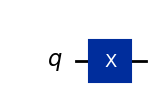

In [48]:
# Recall the simple circuit we built with an X-gate
qcx = QuantumCircuit(1) # Create a quantum circuit with 1 qubit
qcx.x(0) # Apply an X gate to the 0-th qubit
qcx.draw(output='mpl') # draw the circuit

Let's evaluate the expectation value of the final state. Note that the quantum state is NOT measured before applying the estimator.

In [49]:
# from qiskit.primitives import StatevectorEstimator

estimator = StatevectorEstimator()
observables = [Pauli("I")]
pub = (qcx, observables)
result = estimator.run([pub]).result()
expectation_values = result[0].data.evs

print(f"Expectation value for {observables[0]} of qcx: {expectation_values[0]}")

Expectation value for I of qcx: 1.0


In [50]:
# from qiskit.primitives import StatevectorEstimator
circuit2 = QuantumCircuit(1)
circuit2.h(0)

# Instantiate a new statevector simulation based estimator object.
estimator = StatevectorEstimator()
observables = [Pauli("I"), Pauli("X"), Pauli("Y"), Pauli("Z")]
pub = (circuit2, observables)
result = estimator.run([pub]).result()
# res = result[0].data.evs[0]
# res_val = float(res)

# Access the expectation values correctly
expectation_values = result[0].data.evs # Access the values directly

# Print the expectation values for each observable
for i, observable in enumerate(observables):
    print(f"Expectation value for {observable}: {expectation_values[i]}")

Expectation value for I: 0.9999999999999998
Expectation value for X: 0.9999999999999998
Expectation value for Y: 0.0
Expectation value for Z: 0.0


<div class="alert alert-block alert-success">

**Q2.2.1 Differentiate the $|+\rangle|$ and $-\rangle$ states by measurement**  
You have already constructed the two states in Q1.2.6 and Q1.2.7. Let us now measure the probability distribution for each of two. Are you able to differentiate the two from the distribution, and why?

Can you use a Pauli gate as an observable to differentiate the two from each other? Which Pauli gate would work? Use estimator to verify your answer.
</div>

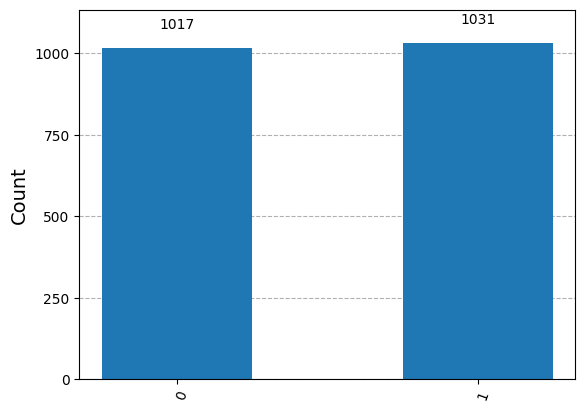

In [51]:
# Measure the |+> state with sampler
qch = QuantumCircuit(1) # Create a quantum circuit with 1 qubit
##### ==================================
# Write your solution in here.
qch.h(0)
qch.measure_all()
shots = 2048
job = sampler.run([qch], shots=shots)
counts = job.result()[0].data.meas.get_counts()
##### ==================================
plot_histogram(counts)

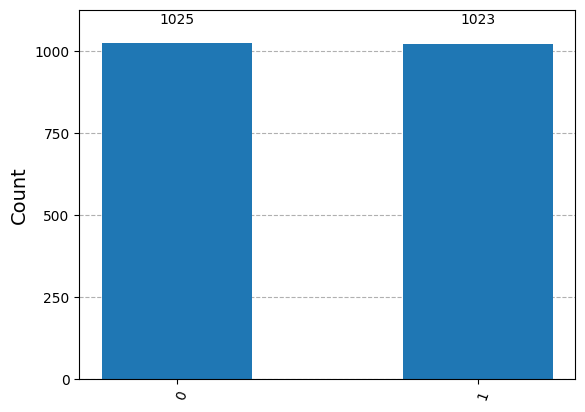

In [52]:
# Measure the |-> state with sampler
qchm = QuantumCircuit(1) # Create a quantum circuit with 1 qubit
##### ==================================
# Write your solution in here.
qchm.x(0)
qchm.h(0)
qchm.measure_all()
shots = 2048
job = sampler.run([qchm], shots=shots)
counts = job.result()[0].data.meas.get_counts()
##### ==================================
plot_histogram(counts)

In [53]:
# Measure the <+|Pauli|+> with estimator, replace Pauli with the Pauli gate that you choose
qch = QuantumCircuit(1) # Create a quantum circuit with 1 qubit
##### ==================================
# Write your solution in here.
qch.h(0)

observables = [Pauli("X")]
pub = (qch, observables)
result = estimator.run([pub]).result()
expectation_values = result[0].data.evs

##### ==================================
print(f"Expectation value for {observables[0]} of |+>: {expectation_values[0]}")


Expectation value for X of |+>: 0.9999999999999998


In [54]:
# Measure the <-|Pauli|-> with estimator, replace Pauli with the Pauli gate that you choose
qchm = QuantumCircuit(1) # Create a quantum circuit with 1 qubit
##### ==================================
# Write your solution in here.
qchm.x(0)
qchm.h(0)

observables = [Pauli("X")]
pub = (qchm, observables)
result = estimator.run([pub]).result()
expectation_values = result[0].data.evs

##### ==================================
print(f"Expectation value for {observables[0]} of |->: {expectation_values[0]}")

Expectation value for X of |->: -0.9999999999999998


## 3. Quantum Algorithms

### 3.1 The Bell states
[Adapted from Juan Santos Suárez's notebook]

The Bell states or EPR pairs are specific quantum states of two qubits that represent the simplest examples of quantum entanglement. There are four of them:

$$|\phi^+\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle+|11\rangle\right),$$
$$|\phi^-\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle-|11\rangle\right),$$
$$|\psi^+\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle+|10\rangle\right),$$
$$|\psi^-\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle-|10\rangle\right).$$



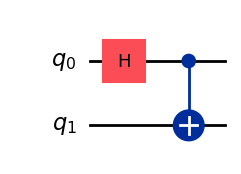

In [ ]:
# the first state can be created by the following circuit
qc_phi_plus = QuantumCircuit(2)
qc_phi_plus.h(0)
qc_phi_plus.cx(0, 1)
qc_phi_plus.draw('mpl')

In [ ]:
# Let's see the result
# from qiskit.quantum_info import Statevector

state = Statevector(qc_phi_plus)

# Note: Qiskit numbers the bits in a string from right to left.
state.draw('latex', max_size=16)

<IPython.core.display.Latex object>

<div class="alert alert-block alert-success">

**Q3.1.1 Build a circuit that prepares the state $|\phi^-\rangle$**  

</div>

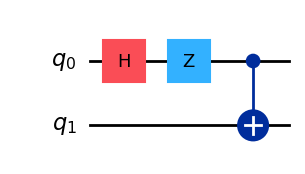

In [ ]:
qc_phi_minus = QuantumCircuit(2)

##### ==================================
# Write your solution in here.
qc_phi_minus.h(0)
qc_phi_minus.z(0)
qc_phi_minus.cx(0, 1)

##### ==================================

qc_phi_minus.draw('mpl')

In [ ]:
# Let's see the result
# from qiskit.quantum_info import Statevector

state = Statevector(qc_phi_minus)

# Note: Qiskit numbers the bits in a string from right to left.
state.draw('latex', max_size=16)

<IPython.core.display.Latex object>

<div class="alert alert-block alert-success">

**Q3.1.2 Build a circuit that prepares the state $|\psi^+\rangle$**  

</div>

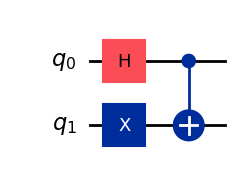

In [ ]:
qc_psi_plus = QuantumCircuit(2)

##### ==================================
# Write your solution in here.
qc_psi_plus.h(0)
qc_psi_plus.x(1)
qc_psi_plus.cx(0, 1)


##### ==================================

qc_psi_plus.draw('mpl')

In [ ]:
# Let's see the result
# from qiskit.quantum_info import Statevector

state = Statevector(qc_psi_plus)

# Note: Qiskit numbers the bits in a string from right to left.
state.draw('latex', max_size=16)

<IPython.core.display.Latex object>

<div class="alert alert-block alert-success">

**Q3.1.3 Build a circuit that prepares the state $|\psi^-\rangle$**  

</div>

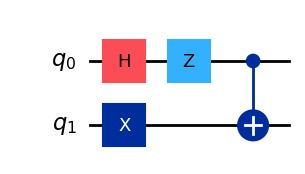

In [ ]:
qc_psi_minus = QuantumCircuit(2)

##### ==================================
# Write your solution in here.
qc_psi_minus.h(0)
qc_psi_minus.x(1)
qc_psi_minus.z(0)
qc_psi_minus.cx(0, 1)
##### ==================================

qc_psi_minus.draw('mpl')

In [ ]:
# Let's see the result
# from qiskit.quantum_info import Statevector

state = Statevector(qc_psi_minus)

# Note: Qiskit numbers the bits in a string from right to left.
state.draw('latex', max_size=16)

<IPython.core.display.Latex object>

These type of maximally entangled states can be generalized to systems with $n$ qubits, which are then called the Greenberger–Horne–Zeilinger (GHZ) states.
$$|\text{GHZ}\rangle_n = \frac{1}{\sqrt{2}}\left(|0\rangle^{\otimes n} + |1\rangle^{\otimes n}\right).$$


<div class="alert alert-block alert-success">

**Q3.1.4 Build a circuit that prepares the state $|\text{GHZ}\rangle_3$ (optional)**

$$|\text{GHZ}\rangle_3 = \frac{1}{\sqrt{2}}\left(|000\rangle + |111\rangle\right)$$

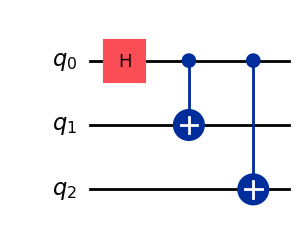

In [ ]:
qc_GHZ = QuantumCircuit(3)

##### ==================================
# Write your solution in here.
qc_GHZ.h(0)
qc_GHZ.cx(0, 1)
qc_GHZ.cx(0, 2)
##### ==================================

qc_GHZ.draw('mpl')

In [ ]:
# Let's see the result
# from qiskit.quantum_info import Statevector

state = Statevector(qc_GHZ)

# Note: Qiskit numbers the bits in a string from right to left.
state.draw('latex', max_size=16)

<IPython.core.display.Latex object>

### 3.2 Addition on Quantum Circuit
[Adapted from Wenyang Qian's notebook]

#### 3.2.1 Classical Addition on Quantum Circuit

Addition is one of the oldest computation and it has many implementations. In the classical computer, the integers are represented as binary numbers (or bit strings). For example,

$ 2 = 10 $   
$ 5 = 101 $   
$ 10 = 1010 $   

By encoding integers as sequence of 0s and 1s, it makes a perfect application in quantum computing. In this exercise, we will look at the implementation of classical addition on the quantum circuit. In particular, we consider two nonnegative integers $a$ and $b$, whose values can be either 0 or 1.

On the quantum circuit, we can represent them as quantum states $|a\rangle$ and $|b\rangle$, and build a two-qubit circuit for quantum addition.

$$
\begin{array}{c}
\Large |q_0 = a\rangle \\
\\
\Large|q_1 = b\rangle \\
\end{array}
\qquad
\begin{array}{c}
\rule{3cm}{1pt} \\ % Top line
\\
\rule{3cm}{1pt} % Bottom line
\end{array}
\qquad
\begin{array}{c}
\Large|a\rangle \\
\\
\Large|a+b\rangle
\end{array}
$$

<div class="alert alert-block alert-success">

**Q3.2.1 Build your integer encoding function**  
Before we build an addition algorithm, it is important to build an integer encoding function on the circuit. For simplicity, we restrict integers to either 0 or 1. The following function returns the quantum circuit with the encoded integer on the qubit specified by the qubit_index.
</div>

In [ ]:
def encode_integer(circuit, qubit_index, integer):
    ##### ==================================
    # Write your solution in here.
    if integer == 1:
        circuit.x(qubit_index)

    ##### ==================================
    return circuit

Binary addition follows the truth table as follows:
| a        | b       | a+b     |
|:--------:|:-------:|:-------:|
| 0        |      0  |      0  |
| 1        |      0  |      1  |
| 0        |      1  |      1  |
| 1        |      1  |      0  |
This is actually a Modulo 2 Addition.

<div class="alert alert-block alert-success">
    
**Q3.2.2 Build your classical addition algorithm on quantum circuit**  
With the encoding function, we can now write the classical addition algorithm using quantum circuit. Use the gates that you learned in this notebook. Try different values of $a$ and $b$ and verify your algorithm.
</div>

In [ ]:
def classical_add(a, b):
    assert a in [0, 1]
    assert b in [0, 1]
    circuit = QuantumCircuit(2)
    ##### ==================================
    # Write your solution in here.
    encode_integer(circuit, 0, a)
    encode_integer(circuit, 1, b)
    circuit.cx(0, 1)
    ##### ==================================
    return circuit


In [ ]:
# You may want to the following code to test your results
# from qiskit.quantum_info import Statevector
# from IPython.display import display, Latex

a=0
b=1
this_circ = classical_add(a, b)
state = Statevector(this_circ)

# Note: Qiskit numbers the bits in a string from right to left.
display(Latex(f'$|ba\\rangle \\to |(a+b)a\\rangle$'))
display(Latex(f'Initial: $|ba\\rangle =|{b}{a}\\rangle$'))
display(Latex(f'Final: $|(a+b)a\\rangle=$'))
state.draw('latex', max_size=16)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Next, let us do addition with a "carry":

$s = (a+b)+carry$

We would need in this case three qubits,

$$
\begin{array}{c}
\Large |q_0 = \text{carry}\rangle \\
\\
\Large |q_1 = a\rangle \\
\\
\Large|q_2 = b\rangle \\
\end{array}
\qquad
\begin{array}{c}
\rule{3cm}{1pt} \\ % Top line
\\
\rule{3cm}{1pt} \\ % Top line
\\
\rule{3cm}{1pt} % Bottom line
\end{array}
\qquad
\begin{array}{c}
\Large |\text{carry}\rangle \\
\\
\Large|a\rangle \\
\\
\Large|a+b+\text{carry}\rangle
\end{array}
$$

<div class="alert alert-block alert-success">

**Q3.2.3 Building your classical addition algorithm with carry**  
    
Now build your classical addition algorithm with carry. Check that your algorithm works for any combination of $a,b,carry=0,1$.
</div>

In [ ]:
def classical_add_with_carry(a, b, carry):
    assert a in [0, 1]
    assert b in [0, 1]
    assert carry in [0, 1]
    circuit = QuantumCircuit(3)
    ##### ==================================
    # Write your solution in here.
    encode_integer(circuit, 0, carry)
    encode_integer(circuit, 1, a)
    encode_integer(circuit, 2, b)
    circuit.cx(0, 2)
    circuit.cx(1, 2)
    ##### ==================================
    return circuit

In [ ]:
# You may want to the following code to test your results
# from qiskit.quantum_info import Statevector
# from IPython.display import display, Latex

a=1
b=1
carry=1
this_circ = classical_add_with_carry(a, b, carry)
state = Statevector(this_circ)

# Note: Qiskit numbers the bits in a string from right to left.
display(Latex(f'$|bac\\rangle \\to |(a+b+c)ac\\rangle$'))
display(Latex(f'Initial: $|bac\\rangle =|{b}{a}{carry}\\rangle$'))
display(Latex(f'Final: $|(a+b+c)ac\\rangle=$'))
state.draw('latex', max_size=16)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### 3.2.2 Quantum Addition on Quantum Circuit
In case you may have wondered, we have used the word "Classical addition" throughout Section 3.2. It is because we have treated quantum addition in the classical way. In quantum arithmetic world, researchers found that it is more efficient to encode binary bits as relative quantum phases, i.e., in the transverse plane (the x-y plane) of the Bloch sphere. In this way, addition of integer is converted to addition of phases where carries can be managed much more conveniently. Quantum addition also allows for circuit parallelization and approximation that is crucial when the problem size increases.

In the following exercise, we will look at the quantum addition algorithm applied to two 1-bit integers $a$ and $b$ as before.

The algorithm is divided into three parts:

(i) Quantum phase encoding   
(ii) Phase addition   
(iii) Quantum phase decoding   


$$
\begin{array}{c}
\\
\Large |q_0 = a\rangle \\
\\
\Large|q_1 = b\rangle \\
\end{array}
\qquad
\begin{array}{c}
\text{Phase Encoding}\\
\rule{3cm}{1pt} \\ % Top line
\\
\rule{3cm}{1pt} % Bottom line
\end{array}
\qquad
\begin{array}{c}
\\
\Large | a\rangle \\
\\
\Large| \phi(b)\rangle \\
\end{array}
\qquad
\begin{array}{c}
\text{Phase Addition}\\
\rule{3cm}{1pt} \\ % Top line
\\
\rule{3cm}{1pt} % Bottom line
\end{array}
\qquad
\begin{array}{c}
\\
\Large |a\rangle \\
\\
\Large|\phi(a+b)\rangle \\
\end{array}
\qquad
\begin{array}{c}
\text{Phase Decoding}\\
\rule{3cm}{1pt} \\ % Top line
\\
\rule{3cm}{1pt} % Bottom line
\end{array}
\qquad
\begin{array}{c}
\Large|a\rangle \\
\\
\Large|a+b\rangle
\end{array}
$$

<div class="alert alert-block alert-success">

**Q3.2.4 Build the single-qubit phase encoding function**  
For the single qubit state $|b\rangle$, we want to encode according to the mapping: $|0\rangle \rightarrow |+\rangle$, $|1\rangle \rightarrow |-\rangle$. What quantum gate or gates should you use to achieve this? Write your function below.
</div>

In [ ]:
def encode_integer_to_phase(circuit, qubit):
    ##### ==================================
    # Write your solution in here. Remember, before encoding to phases,
    # your integers are already encoded as quantum state |0> and |1>
    circuit.h(qubit)
    ##### ==================================
    return circuit

In [ ]:
# You may want to the following code to test your results
a = 0; b = 0;
this_circ = QuantumCircuit(2)
this_circ = encode_integer(this_circ, 0, a)
this_circ = encode_integer(this_circ, 1, b)
this_circ = encode_integer_to_phase(this_circ, 1)
state = Statevector(this_circ)
# Note: Qiskit numbers the bits in a string from right to left.
display(Latex(f'$|ba\\rangle \\to |\\phi(b)a\\rangle$'))
display(Latex(f'Initial: $|ba\\rangle =|{b}{a}\\rangle$'))
display(Latex(f'Final: $|\phi(b)a\\rangle=$'))
state.draw('latex', max_size=16)

<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
/scratch/115972/ipykernel_676898/3473652619.py:11: SyntaxWarning: invalid escape sequence '\p'
  display(Latex(f'Final: $|\phi(b)a\\rangle=$'))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<div class="alert alert-block alert-success">

**Q3.2.5 Build the phase addition function**  
Write a phase addition function to add the phase of incoming integer state $|a\rangle$ to recipient state $|\phi(b)\rangle$.    
</div>


In the quantum phase addition part, we want to add the quantum phase of $|a\rangle$ to $|\phi(b)\rangle$ without modifying the state $|a\rangle$. As you can imagine, this type of operation is best achieved using a controlled gate. Speaking of quantum phases, the most intuitive gate to use is the controlled-phase gate or CP-gate. In Qiskit, you can use "circuit.cp(theta, control_qubit, target_qubit)" to apply a CP-gate with an angle of theta (in radians). Since the phase between $|+\rangle$ and $|-\rangle$ is $\pi$, we should rotate an angle of $\pi$, to make the addition on equal footing.

In [ ]:
# from math import pi
def phase_addition(circuit, incoming_qubit, recipient_qubit):
    ##### ==================================
    # Write your solution in here.
    circuit.cp(pi, incoming_qubit, recipient_qubit)
    ##### ==================================
    return circuit

In [ ]:
# You may want to the following code to test your results
a = 1; b = 1;
this_circ = QuantumCircuit(2)
this_circ = encode_integer(this_circ, 0, a)
this_circ = encode_integer(this_circ, 1, b)
this_circ = encode_integer_to_phase(this_circ, 1)
this_circ = phase_addition(this_circ, 0, 1)
state = Statevector(this_circ)
# Note: Qiskit numbers the bits in a string from right to left.
display(Latex(f'$|ba\\rangle \\to |\\phi(a+b)a\\rangle$'))
display(Latex(f'Initial: $|ba\\rangle =|{b}{a}\\rangle$'))
display(Latex(f'Final: $|\phi(a+b)a\\rangle=$'))
state.draw('latex', max_size=16)

<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
/scratch/115972/ipykernel_676898/3777492422.py:12: SyntaxWarning: invalid escape sequence '\p'
  display(Latex(f'Final: $|\phi(a+b)a\\rangle=$'))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<div class="alert alert-block alert-success">

**Q3.2.6 Build the phase decoding function**  
Decoding in quantum computing is easy as all quantum operations are reversible. Write your phase decoding function, which is the reverse of your encoding function.
</div>

In [ ]:
def decode_phase_to_integer(circuit, qubit):
    ##### ==================================
    # Write your solution in here.
    circuit.h(qubit)
    ##### ==================================
    return circuit

<div class="alert alert-block alert-success">

**Q3.2.7 Build the final quantum addition algorithm function**  
Now, let's put the above three ingradients together.
</div>

In [ ]:
def quantum_add(a, b):
    assert a in [0, 1]
    assert b in [0, 1]
    circuit = QuantumCircuit(2)
    ##### ==================================
    # Write your solution in here.
    circuit = QuantumCircuit(2)
    circuit = encode_integer(circuit, 0, a)
    circuit = encode_integer(circuit, 1, b)
    circuit = encode_integer_to_phase(circuit, 1)
    circuit = phase_addition(circuit, 0, 1)
    circuit = decode_phase_to_integer(circuit, 1)
    ##### ==================================
    return circuit


In [ ]:

# You may want to the following code to test your results
this_circ = quantum_add(a=1, b=0)
state = Statevector(this_circ)
# Note: Qiskit numbers the bits in a string from right to left.
display(Latex(f'$|ba\\rangle \\to |(a+b)a\\rangle$'))
display(Latex(f'Initial: $|ba\\rangle =|{b}{a}\\rangle$'))
display(Latex(f'Final: $|(a+b)a\\rangle=$'))
state.draw('latex', max_size=16)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### 3.3 A glance into the well-knowns
The most spectacular discovery in quantum computing to date is that quantum computers
can efficiently perform some tasks which are not feasible on a classical computer.


<img src="images/Algorithm_Niels_Chua_4.1.png" width="600">
Figure adapted from Nielsen, M. A., & Chuang, I. L. (2010); Quantum Computation and Quantum Information: 10th Anniversary Edition; Cambridge: Cambridge University Press.

#### 3.3.1 Quantum Fourier Transform

##### Definition and notation


In quantum computing, the **quantum Fourier transform (QFT)** is a linear transformation on quantum bits, and is the quantum analogue of the **discrete Fourier transform (DFT)**.

The DFT takes as input a vector of complex numbers, $ x_0, \dots, x_{N-1} $ where $ N $ is the length of the vector. It outputs the transformed data, a vector of complex numbers $y_0, \dots, y_{N-1} $, defined by

$$
\text{DFT}: y_k \equiv \frac{1}{\sqrt{N}} \sum_{j=0}^{N-1} x_j e^{2\pi ijk/N}.
$$

$$
\text{inverse DFT}: x_j = \frac{1}{\sqrt{N}} \sum_{k=0}^{N-1} y_k e^{-2\pi ijk/N}.
$$


The QFT takes as input an amplitude $\{x_j\} (j=0,1,2,\dots,N-1)$ on an orthonormal basis $|j\rangle$, and transforms it to the amplitudes $\{y_k\} (k=0,1,2,\dots,N-1)$ on an orthonormal basis $|k\rangle$, with the following action on the basis states,

$$
\text{QFT}: |j\rangle \ \longrightarrow \ \frac{1}{\sqrt{N}} \sum_{k=0}^{N-1} e^{2\pi ijk/N} |k\rangle.  
$$
$$
\text{inverse QFT}: |k\rangle \ \longrightarrow \ \frac{1}{\sqrt{N}} \sum_{j=0}^{N-1} e^{-2\pi ijk/N} |j\rangle.  
$$

Equivalently, the action on an arbitrary state may be written

$$
\sum_{j=0}^{N-1} x_j |j\rangle \ \longrightarrow \ \sum_{k=0}^{N-1} y_k |k\rangle,
$$

This transformation is a unitary transformation, and thus can be implemented as the dynamics for a quantum computer.




Let us take $N = 2^n$, where $n$ is some integer, and the basis $|0\rangle, \dots, |2^n - 1\rangle$ is the computational basis for an $n$-qubit quantum computer. It is helpful to write the state $|j\rangle$ using the binary representation $j = j_1 j_2 \dots j_n$. More formally,  

$$
j = j_1 2^{n-1} + j_2 2^{n-2} + \dots + j_n 2^0.
$$  

It is also convenient to adopt the notation $0.j_l j_{l+1} \dots j_m$ to represent the *binary fraction*  

$$
j_l/2 + j_{l+1}/4 + \dots + j_m/2^{m-l+1}.
$$  

With these notations, we can write QFT in the *product representation*:  

$$
|j_1, \dots, j_n\rangle \ \longrightarrow \ \frac{ \left( |0\rangle + e^{2\pi i 0.j_n} |1\rangle \right) \left( |0\rangle + e^{2\pi i 0.j_{n-1} j_n} |1\rangle \right) \dots \left( |0\rangle + e^{2\pi i 0.j_1 j_2 \dots j_n} |1\rangle \right) }{2^{n/2}}.
$$


##### Circuit implementation

The quantum gates used in the n-qubit circuit are the Hadamard gate and the dyadic rational phase gate $R_k$,

$R_k = \begin{pmatrix}
1 & 0 \\
0 & e^{2\pi i/2^k} \\
\end{pmatrix}$

The following is an efficient circuit for the QFT:
<img src="images/QFT_circuit.png" width="1000">
Figure adapted from Nielsen, M. A., & Chuang, I. L. (2010); Quantum Computation and Quantum Information: 10th Anniversary Edition; Cambridge: Cambridge University Press.

This circuit provides a $\mathcal O(n^2)$ algorithm for performing the QFT. In contrast, the best classical algorithms for computing the DFT on $2^n$ elements are algorithms such as the Fast Fourier Transform (FFT), which uses $\mathcal O(n 2^n)$ gates.

*QFT is an efficient quantum algorithm for performing a Fourier transform of quantum mechanical amplitudes. Note that, however, it does not speed up the classical task of computing Fourier transforms of classical data.

<div class="alert alert-block alert-success">

**Q3.3.1 Single-qubit QFT**

What is the operation of the Quantum Fourier Transform for a single qubit?
Hint: check the aforementioned definition of QFT, and apply $n=1$, $N=2^n=1$ to it.
</div>

Let us use the QFT library in qiskit to implement the QFT and its inverse.

class qiskit.circuit.library.QFT(num_qubits=None, approximation_degree=0, do_swaps=True, inverse=False, insert_barriers=False, name=None)

Parameters:

- **num_qubits** (int | None) – The number of qubits on which the QFT acts.
- approximation_degree (int) – The degree of approximation (0 for no approximation).
- **do_swaps** (bool) – Whether to include the final swaps in the QFT.
- **inverse** (bool) – If True, the inverse Fourier transform is constructed.
- insert_barriers (bool) – If True, barriers are inserted as visualization improvement.
- name (str | None) – The name of the circuit.


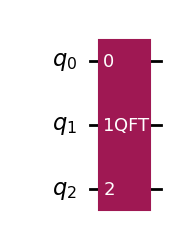

In [ ]:
n = 3

iqft_circ = QFT(n, do_swaps=True, inverse=False)

qc_iqft = QuantumCircuit(n)

qc_iqft.append(iqft_circ, qc_iqft.qubits)
qc_iqft.draw('mpl')

In [ ]:
# Let's see the result
state = Statevector(qc_iqft)

# Note: Qiskit numbers the bits in a string from right to left.
state.draw('latex', max_size=16)

<IPython.core.display.Latex object>

Is this what you would expect? Think about the FT of the Dirac delta function.

<div class="alert alert-block alert-success">

**Q3.3.2 QFT and its inverse**

1. Create a quantum circuit with 4 qubits and prepare an initial state $\frac{1}{\sqrt{2}}(|0000\rangle+|0001\rangle)$ on it.
2. Apply QFT on it, check the outgoing state using statevector.
3. Apply inverse QFT on the circuit, and check the final state.
</div>

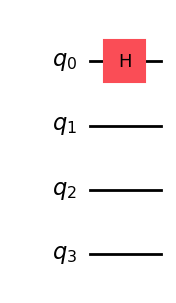

<IPython.core.display.Latex object>

In [ ]:
# step 1, initialize the state
qc_QFT = QuantumCircuit(4)

##### ==================================
# Write your solution in here.
qc_QFT.h(0)
##### ==================================

display(qc_QFT.draw('mpl'))

# Let's check the initial state
state = Statevector(qc_QFT)
state.draw('latex', max_size=16)

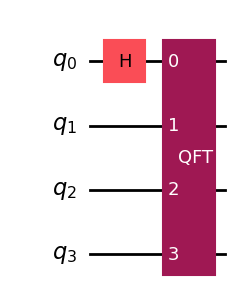

<IPython.core.display.Latex object>

In [ ]:
# step 2, apply QFT

##### ==================================
# Write your solution in here.
qft_circ = QFT(4, do_swaps=False, inverse=False)
qc_QFT.append(qft_circ, qc_QFT.qubits)
##### ==================================

display(qc_QFT.draw('mpl'))

# Let's check the initial state
state = Statevector(qc_QFT)
state.draw('latex', max_size=16)

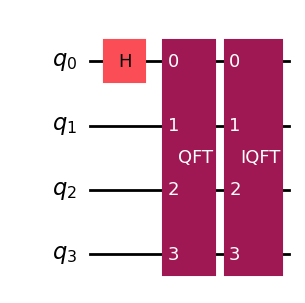

<IPython.core.display.Latex object>

In [ ]:
# step 3, apply inverse QFT

##### ==================================
# Write your solution in here.
iqft_circ = QFT(4, do_swaps=False, inverse=True)
qc_QFT.append(iqft_circ, qc_QFT.qubits)
##### ==================================

display(qc_QFT.draw('mpl'))

# Let's check the initial state
state = Statevector(qc_QFT)
state.draw('latex', max_size=16)

#### 3.3.2 Grover's quantum search algorithm
[We will learn more in "Lecture 2. Search Algorithms: Grover" with Juan Santos Suárez]

##### Problem description
As input for Grover's algorithm, suppose we have a function $f:\{0,1,...,N-1\}\rightarrow\{0,1\}$. In the "unstructured database" analogy, the domain represents indices to a database, and $f(x)=1$ if and only if the data that $x$ points to satisfies the search criterion. We additionally assume that only one index satisfies $f(x)=1$ and we call this index $\omega$. Our goal is to identify $\omega$.

We can access $f$ with a subroutine (sometimes called an *oracle*) in the form of a unitary operator $U_{\omega}$ that acts as follows:

$$
\begin{cases}
U_{\omega}|x\rangle = -|x\rangle & \text{for } x = \omega, \text{ that is, } f(x) = 1, \\
U_{\omega}|x\rangle = |x\rangle & \text{for } x \ne \omega, \text{ that is, } f(x) = 0.
\end{cases}
$$

This uses the $N$-dimensional state space $\mathcal{H}$, which is supplied by a register with $n = \lceil \log_2 N \rceil$ qubits. This is often written as

$$
U_{\omega}|x\rangle = (-1)^{f(x)}|x\rangle.
$$

<!-- Grover's algorithm outputs $\omega$ with probability at least 1/2 using $O(\sqrt{N})$ applications of $U_{\omega}$. This probability can be made arbitrarily large by running Grover's algorithm multiple times. If one runs Grover's algorithm until $\omega$ is found, the expected number of applications is still $O(\sqrt{N})$ since it will only be run twice on average. -->

##### Circuit implementation

The following is a schematic circuit for the quantum search algorithm:
<img src="images/Grover1.png" width="1000">
in which Grover iteration, G, is
<img src="images/Grover2.png" width="600">

Figure adapted from Nielsen, M. A., & Chuang, I. L. (2010); Quantum Computation and Quantum Information: 10th Anniversary Edition; Cambridge: Cambridge University Press.

The output will be $|\omega\rangle$ with probability approaching 1 for $N\gg1$.

This algorithm takes $\mathcal O(\sqrt{N})$ operations, whereas theclassical algorithms need to take $\mathcal O(N)$ operations.